In [98]:
# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import gamma

# Mead imports
import mead_field as field

# Map parameters
pixels = 1000      # Number of cells in map
map_size = 100.    # Size of map [km]
periodic = True    # Is the map periodic or not?
plot_size = 10     # Plot size [inches]
random_seed = None # Random number seed (can be None)

# Terrain parameters
sea_level = 0.            # Sea level [m]
shallow_depth = -50.      # Depth above which water is 'shallow' [m]
# beach_altitude = 0.       # Altitude below which a beach is found [m]
mountain_altitude = 1000. # Altitude above which mountains are defined [m]
snow_altitude = 2000.     # Altitude above which snowy mountains are defined [m]
desert_rain = 50.         # Rainfall less than this qualifies as desert [mm/yr]
tropical_rain = 2000.     # Rainfall greater than this qualifies as tropical [mm/yr]

# Altitude parameters
altitude_mean = 200.           # Mean height above sea level [m]
altitude_sigma = 800.          # Standard deviation for altitude [m]
altitude_smooth = 0.3*map_size # Maximum-ish size of features in altitude [km]
altitude_index = -0.5          # Altitude power-law index
altitude_power = 2.            # Power for non-linear field transformation

# Rainfall parameters
rainfall_mean = 1000.          # Mean rainfall [mm/year]
rainfall_sigma = 2000.         # Standard deviation of rainfall [mm/year]
rainfall_smooth = 0.7*map_size # Maximum-ish size of features in rainfall [km]
rainfall_index = -1.5          # Rainfall power-law index

# Power spectrum options
power_damping_method = "exponential"
power_damping_method = "Gaussian"

# Dictionary relating terrain types to integers and colors
terrain_dictionary = {
    'ocean': 'blue',
    'shallows': 'deepskyblue',
    'forest': 'forestgreen',
    'mountain': 'sienna',
    'snow': 'snow',
    'desert': 'goldenrod',
    'tropical': 'limegreen',
}

# Function for the spatial power spectrum
if power_damping_method == "exponential":
    def power_spectrum(k, A, n, kdamp):
        return A*(k**n)*np.exp(-k/kdamp)
    def normalisation(sigma, n, kdamp):
        return 2.*np.pi*sigma**2/(gamma(n+2)*kdamp**(n+2))
elif power_damping_method == "Gaussian":
    def power_spectrum(k, A, n, kdamp):
        return A*(k**n)*np.exp(-k**2/(2.*kdamp**2))
    def normalisation(sigma, n, kdamp):
        return 2.*np.pi*sigma**2/(2.**(n/2)*gamma(n/2.+1.)*kdamp**(n+2))
else:
    raise ValueError("Unknown power damping method")

In [99]:
# Checks
if altitude_index <= -2.:
    raise ValueError('Altitude power-law index cannot be equal to or less than -2')  
if rainfall_index <= -2.:
    raise ValueError('Rainfall power-law index cannot be equal to or less than -2')

In [100]:
# Calculations

# Fill colour map
colors = []
for color in terrain_dictionary.values():
    colors.append(color)
terrain_colors = mpl.colors.ListedColormap(colors)
    
# Calculations
cell_size = map_size / np.real(pixels)
altitude_kdamp = 2.*np.pi/altitude_smooth
rainfall_kdamp = 2.*np.pi/rainfall_smooth
altitude_A = normalisation(altitude_sigma, altitude_index, altitude_kdamp)
rainfall_A = normalisation(rainfall_sigma, rainfall_index, rainfall_kdamp)

# Seed the random-number generator
np.random.seed(random_seed)

In [101]:
print('Map properties')
print('Map size [km]:', map_size)
print('Number of pixels per side:', pixels)
print('Cell size [km]:', cell_size)
print('Mountain height [m]:', mountain_altitude)
print('Snow line [m]:', snow_altitude)
print('Desert rain [mm/yr]:', desert_rain)
print('Tropical rain [mm/yr]:', tropical_rain)
print('')

print('Altitude properties')
print('Altitude mean [m]:', altitude_mean)
print('Altitude standard deviatiton [m]:', altitude_sigma)
print('Altitude power-law index:', altitude_index)
print('Altitude feature smoothing scale [km]:', altitude_smooth)
print('Altitude feature smoothing wavenumber [1/km]:', altitude_kdamp)
print('Altitude power normalisation [m^2 km^2]:', altitude_A)
print('Altitude power normalisation root [m km]:', np.sqrt(altitude_A))
print('')

print('Rainfall properties')
print('Rainfall mean [mm/yr]:', rainfall_mean)
print('Rainfall standard deviatiton [mm/yr]:', rainfall_sigma)
print('Rainfall power-law index:', rainfall_index)
print('Rainfall feature smoothing scale [km]:', rainfall_smooth)
print('Rainfall feature smoothing wavenumber [1/km]:', rainfall_kdamp)
print('Rainfall power normalisation [(mm/yr)^2 km^2]:', rainfall_A)
print('Rainfall power normalisation root [mm/yr km]:', np.sqrt(rainfall_A))
print('')

Map properties
Map size [km]: 100.0
Number of pixels per side: 1000
Cell size [km]: 0.1
Mountain height [m]: 1000.0
Snow line [m]: 2000.0
Desert rain [mm/yr]: 50.0
Tropical rain [mm/yr]: 2000.0

Altitude properties
Altitude mean [m]: 200.0
Altitude standard deviatiton [m]: 800.0
Altitude power-law index: -0.5
Altitude feature smoothing scale [km]: 30.0
Altitude feature smoothing wavenumber [1/km]: 0.20943951023931953
Altitude power normalisation [m^2 km^2]: 40714173.71577062
Altitude power normalisation root [m km]: 6380.765919211472

Rainfall properties
Rainfall mean [mm/yr]: 1000.0
Rainfall standard deviatiton [mm/yr]: 2000.0
Rainfall power-law index: -1.5
Rainfall feature smoothing scale [km]: 70.0
Rainfall feature smoothing wavenumber [1/km]: 0.08975979010256552
Rainfall power normalisation [(mm/yr)^2 km^2]: 38912610.52346293
Rainfall power normalisation root [mm/yr km]: 6237.99731672457



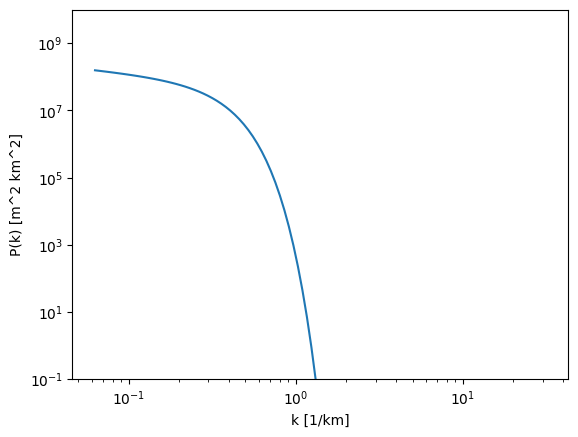

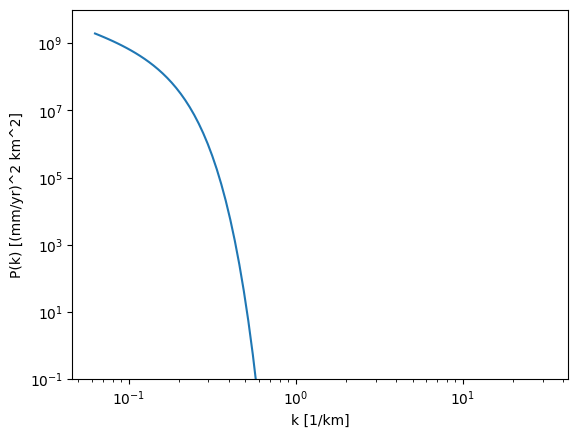

In [102]:
# Parameters for power spectrum plots
kmin = 2.*np.pi/map_size     # Fundamental mode
kmax = pixels*np.pi/map_size # Nyquist mode
nk = 101                     # Number of wavenumbers to plot

# Set arrays to plot
k = np.logspace(np.log10(kmin), np.log10(kmax), nk)

# Plot power spectra
for i in range(2):
    klab = 'k [1/km]'
    if i == 0:
        Pk = power_spectrum(k, altitude_A, altitude_index, altitude_kdamp)
        Pklab = 'P(k) [m^2 km^2]'
    elif i == 1:
        Pk = power_spectrum(k, rainfall_A, rainfall_index, rainfall_kdamp)
        Pklab = 'P(k) [(mm/yr)^2 km^2]'
    plt.plot(k, Pk)
    plt.xlabel(klab)
    plt.xscale('log')
    plt.ylabel(Pklab)
    plt.yscale('log')
    plt.ylim((1e-1, 1e10))
    plt.show()

In [103]:
# Create altitude random field
altitude = field.make_Gaussian_random_field_2D(altitude_mean, 
                                               lambda k: power_spectrum(k, altitude_A, altitude_index, altitude_kdamp), 
                                               map_size, 
                                               pixels,
                                               periodic,
                                               )

# Create rainfall random field
rainfall = field.make_Gaussian_random_field_2D(rainfall_mean, 
                                               lambda k: power_spectrum(k, rainfall_A, rainfall_index, rainfall_kdamp), 
                                               map_size, 
                                               pixels,
                                               periodic
                                               )

for transform in [False, True]:
    
    if transform:
    
        print('Applying transformations')
        print('')
        
        # Altitude transformations
        # TODO: What about log-normal?
        #altitude[altitude > 0.] = altitude*(altitude/2000.)**2
        #altitude[altitude < 0.] = altitude/2.
        altitude = altitude*np.absolute(altitude/snow_altitude)**(altitude_power-1.)
        #altitude = 0.*altitude+beach_altitude/2. # TODO: Remove

        # Rainfall transformations
        rainfall[rainfall < 0.] = 0. # Set rainfall to zero if less than zero?

    print('Altitude properties')
    print('Measured mean altitude [m]:', np.mean(altitude))
    print('Measured standard deviation of altitude [m]:', np.std(altitude))
    print('Ratio of measured to desired standard deviation of altitude:', np.std(altitude)/altitude_sigma)
    print('')

    print('Rainfall properties')
    print('Note that the standard deviation might be low due to no negative rainfall being enforced')
    print('Measured mean rainfall [mm/yr]:', np.mean(rainfall))
    print('Measured standard deviation of altitude [mm/yr]:', np.std(rainfall))
    print('Ratio of measured to desired standard deviation of altitude:', np.std(rainfall)/rainfall_sigma)
    print('')

Altitude properties
Measured mean altitude [m]: 199.99999999999994
Measured standard deviation of altitude [m]: 746.6170225629032
Ratio of measured to desired standard deviation of altitude: 0.933271278203629

Rainfall properties
Note that the standard deviation might be low due to no negative rainfall being enforced
Measured mean rainfall [mm/yr]: 1000.0000000000003
Measured standard deviation of altitude [mm/yr]: 1363.3540540684633
Ratio of measured to desired standard deviation of altitude: 0.6816770270342316

Applying transformations

Altitude properties
Measured mean altitude [m]: 117.91518365686937
Measured standard deviation of altitude [m]: 462.98419333072394
Ratio of measured to desired standard deviation of altitude: 0.5787302416634049

Rainfall properties
Note that the standard deviation might be low due to no negative rainfall being enforced
Measured mean rainfall [mm/yr]: 1193.0708363838182
Measured standard deviation of altitude [mm/yr]: 1114.0983144223517
Ratio of measur

In [104]:
# Array for the terrain integers
terrain_list = list(terrain_dictionary.keys())
terrain_type = np.ones((pixels, pixels), dtype=int)*terrain_list.index('ocean')

# Decide upon the terrain types
# TODO: Replace loop with numpy array operations
for irow in range(pixels):
    for icol in range(pixels):
        alt = altitude[irow, icol]
        rain = rainfall[irow, icol]
        if alt < shallow_depth:
            terrain = terrain_list.index('ocean')
        elif shallow_depth <= alt and alt < sea_level:
            terrain = terrain_list.index('shallows')
        elif mountain_altitude <= alt and alt < snow_altitude:
            terrain = terrain_list.index('mountain')
        elif snow_altitude <= alt:
            terrain = terrain_list.index('snow')
        elif sea_level <= alt and alt < mountain_altitude:
            if rain <= desert_rain:
                terrain = terrain_list.index('desert')
            elif rain >= tropical_rain:
                terrain = terrain_list.index('tropical')
            else:
                terrain = terrain_list.index('forest')
        else:
            raise ValueError('Terrain undefined')
        terrain_type[irow, icol] = terrain

In [105]:
# Find peaks
# peaks = field.find_field_peaks_2D(altitude, pixels, pixels, periodic)
# print(peaks)
# i, j = zip(*peaks)

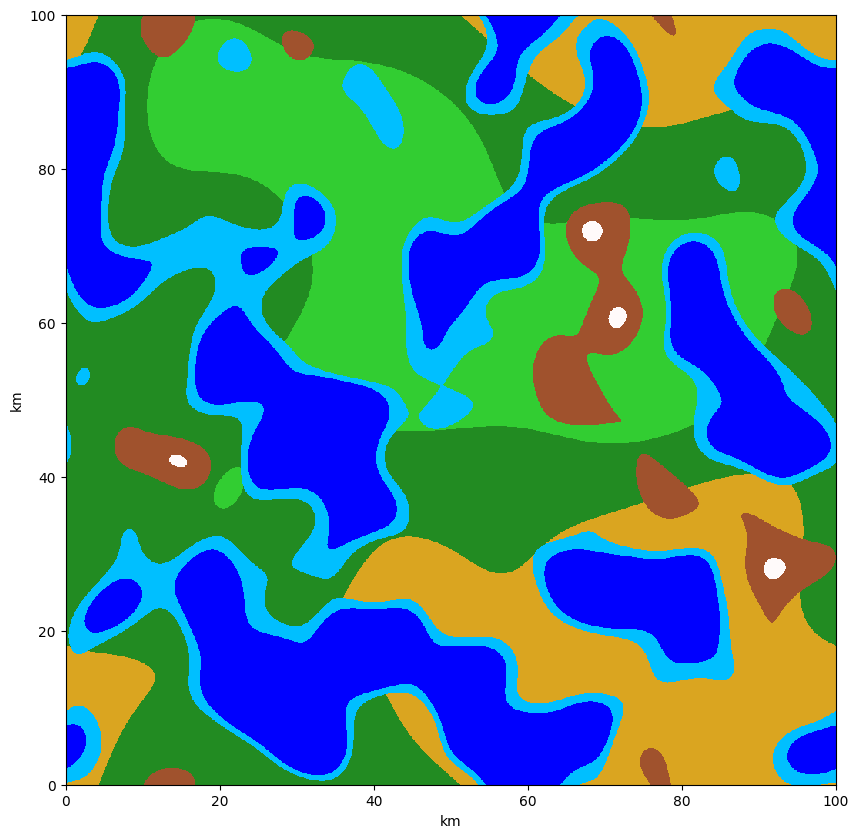

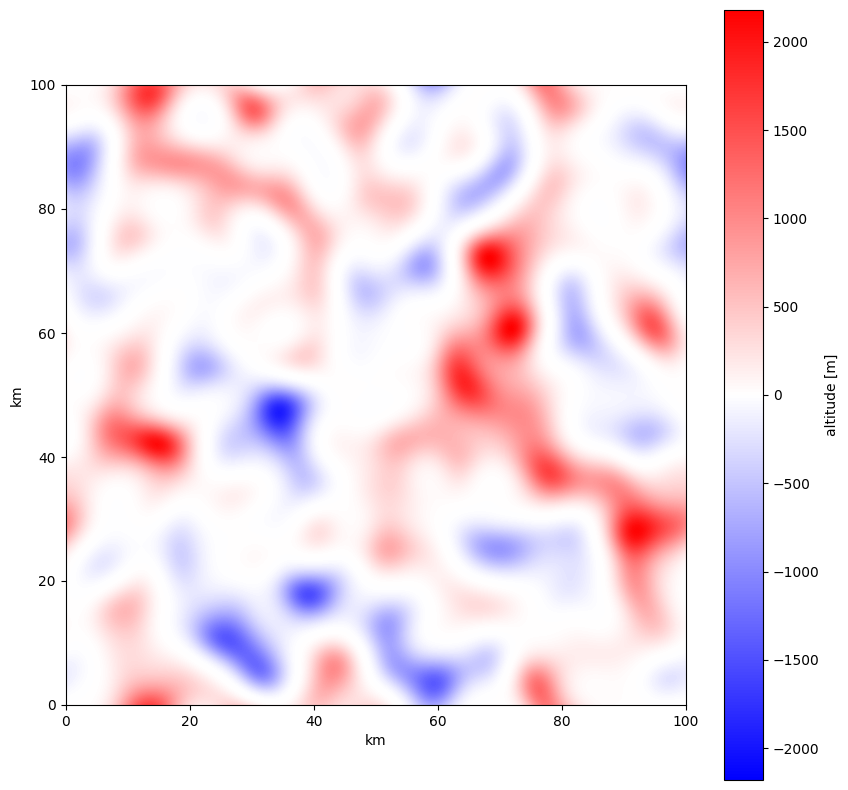

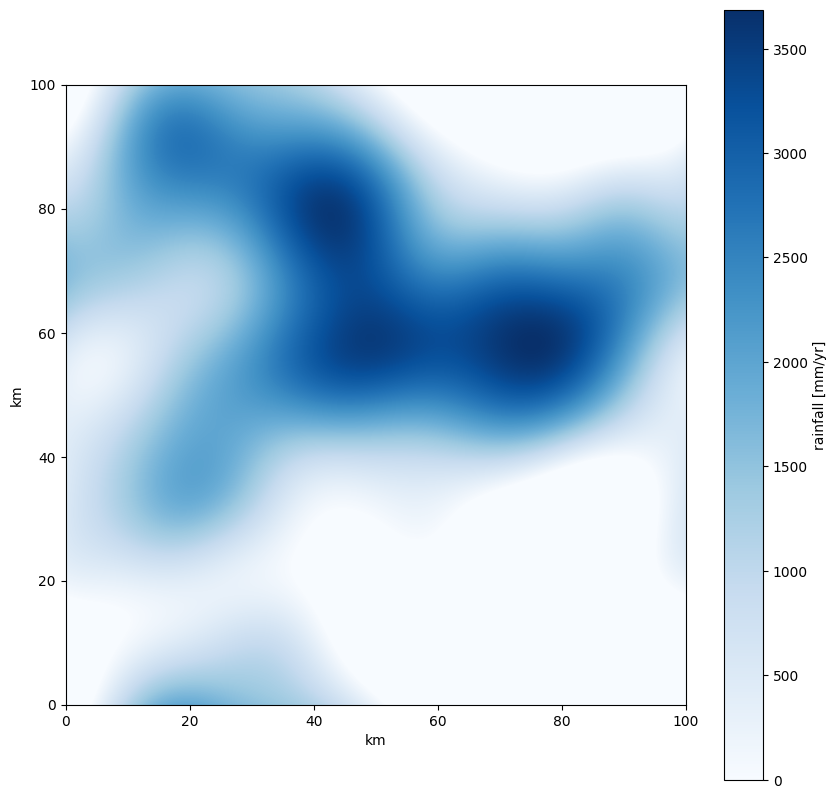

In [106]:
extent = [0., map_size, 0., map_size]
for iplot in range(3):
    plt.figure(figsize=(plot_size, plot_size))
    if iplot == 0:
        plt.imshow(terrain_type, cmap=terrain_colors, extent=extent,
                   vmin=0,
                   vmax=len(terrain_dictionary)-1,
                   interpolation='nearest',
                  )
    elif iplot == 1:
        scale = np.amax(np.absolute(altitude))
        image = plt.imshow(altitude, cmap='bwr', extent=extent,
                  vmin=-scale,
                  vmax=scale,
                  )
        color_bar_label = 'altitude [m]'
    elif iplot == 2:
        plt.imshow(rainfall, cmap='Blues', extent=extent,
                  vmin=0.,
                  vmax=np.amax(np.absolute(rainfall))
                  )
        color_bar_label = 'rainfall [mm/yr]'
    if (iplot == 1) or (iplot == 2):
        cbar = plt.colorbar()
        cbar.set_label(color_bar_label)
    plt.xlabel('km')
    plt.ylabel('km')
    plt.show()